In [2]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functions_evaluation import nse

Part 1. Initialize information

In [3]:
# paths to access the information
path_entities = "../data/basin_id/basins_camels_us_531.txt"
path_data = "../data/CAMELS_US"
path_additional_features = "../data/CAMELS_US/pet_hargreaves.pickle"

color_palette = {
    "Hybrid": "#ff7f0e",
    "benchmark": "#9467bd"
    }

path_results_benchmark= "../experiments/runs/dPLHBV/data/rnnStreamflow/CAMELSDemo/dPLHBV/ALL/TDTestforc/TD1_13/daymet/BuffOpt0/RMSE_para0.25/111111/Train19801001_19951001Test19951001_20101001Buff5478Staind5477/Eva50.npy"
path_results_hybrid = "../experiments/runs/benchmarkfeng_dynamic_0207_144347/test/model_epoch020/test_results.p"

time_period = ["1995-10-01","2010-09-30"] 
full_date_range = pd.date_range(start=time_period[0], end=time_period[1])

Part 2. Read the information

In [4]:
# Read information produced by hybrid and store it in dictionary of dataframes -------------------------------------
with open(path_results_hybrid, "rb") as f:
    info_hybrid= pickle.load(f)

hybrid_results = {} # results only for testing period
for basin in info_hybrid.keys():
    y_obs = info_hybrid[basin]["1D"]["xr"]["QObs(mm/d)_obs"].to_pandas().iloc[0].values
    y_sim = info_hybrid[basin]["1D"]["xr"]["QObs(mm/d)_sim"].to_pandas().iloc[0].values
    hybrid_results[basin] = pd.DataFrame(data={"y_obs": y_obs, "y_sim": y_sim}, index=full_date_range)
    
df_NSE_hybrid = pd.DataFrame(data={'basin_id': list(hybrid_results.keys()), 
                                   'NSE_Hybrid': np.round(nse(df_results=hybrid_results, average=False),3)}).set_index('basin_id')

df_sorted = df_NSE_hybrid.sort_values(by='NSE_Hybrid')
df_sorted["cdf"] = np.arange(len(df_sorted)) / (len(df_sorted) - 1)

# Read information from benchmark
NSE_Feng = np.load(path_results_benchmark, allow_pickle=True)[0]['NSE']
NSE_Feng = np.sort(NSE_Feng)

Part 3. Plot the results

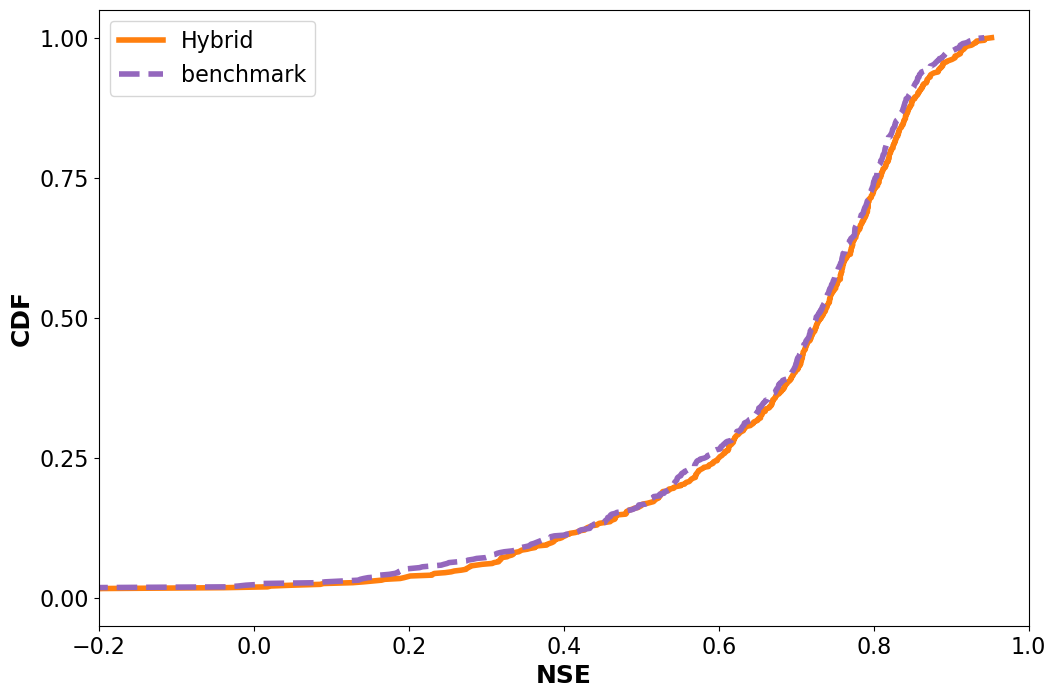

In [8]:
#Create plot
plt.rcParams["figure.figsize"]=(12,8)

plt.plot(df_sorted["NSE_Hybrid"], df_sorted["cdf"], label="Hybrid", linewidth=4, color=color_palette["Hybrid"])
plt.plot(NSE_Feng, df_sorted["cdf"], label="benchmark" , linestyle="--", linewidth=4, color=color_palette["benchmark"])

plt.xlim(-0.2, 1)
plt.xlabel("NSE", fontsize=18, fontweight="bold")
plt.ylabel("CDF", fontsize=18, fontweight="bold")
plt.xticks(fontsize=16)    
plt.yticks([i * 0.25 for i in range(5)], fontsize=16)

plt.legend(loc="upper left", fontsize=16)
plt.savefig("benchmark.png", bbox_inches="tight", pad_inches=0.05, dpi=300)
plt.show()